#Read ME 
###Adam Shirley  

###bsa919adam@gmail.com  

###CPSC 585 Project 5  
Neural Network to identify letters from EMNIST image database 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
data =  np.load("/content/drive/MyDrive/emnist_letters.npz")
train_labels = data['train_labels']
train_images = data['train_images']
validate_images = data['validate_images']
validate_labels = data['validate_labels']
test_images = data['test_images']
test_labels = data['test_labels']

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Experiment 1

In [ ]:
def get_letter(x):
    return(chr(64+(np.argmax(x, axis =-1))))
get_letter(train_labels[0])

'W'

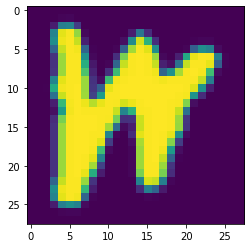

In [ ]:
plt.imshow(train_images[0].reshape(28, 28))

## Experiment 2

In [ ]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(keras.layers.Dense(27, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network.fit(train_images, train_labels, epochs=10, batch_size=128)

validate_loss, validate_acc = network.evaluate(validate_images, validate_labels)
print('validate_acc:', validate_acc)

Epoch 1/10
813/813 [==============================] - 3s 3ms/step - loss: 1.0831 - accuracy: 0.6903
Epoch 2/10
813/813 [==============================] - 2s 3ms/step - loss: 0.4052 - accuracy: 0.8745
Epoch 3/10
199/813 [======>.......................] - ETA: 1s - loss: 0.3185 - accuracy: 0.9010

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

650/650 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8885
test_acc: 0.8884615302085876


The accuracy achieved is around 90% and this is prety good but no where close to as good as the 97% for MNIST

## Experiment 3

In [ ]:
network_test0 = keras.models.Sequential()
network_test0.add(keras.layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
network_test0.add(keras.layers.Dense(27, activation='softmax'))

network_test0.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test0.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 5)] )

Epoch 1/10
722/813 [=========================>....] - ETA: 0s - loss: 1.0332 - accuracy: 0.6972

KeyboardInterrupt: ignored

In [ ]:
network_test1 = keras.models.Sequential()
network_test1.add(keras.layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))
network_test1.add(keras.layers.Dense(27, activation='softmax'))

network_test1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test1.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 5)] )

Epoch 1/10
558/813 [===================>..........] - ETA: 0s - loss: 1.0650 - accuracy: 0.6893

KeyboardInterrupt: ignored

In [ ]:
network_test2 = keras.models.Sequential()
network_test2.add(keras.layers.Dense(4096, activation='relu', input_shape=(28 * 28,)))
network_test2.add(keras.layers.Dense(27, activation='softmax'))

network_test2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test2.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience= 5)] )

Epoch 1/100
289/813 [=========>....................] - ETA: 2s - loss: 1.3348 - accuracy: 0.6184

KeyboardInterrupt: ignored

In [ ]:
network_test3 = keras.models.Sequential()
network_test3.add(keras.layers.Dense(8192, activation='relu', input_shape=(28 * 28,)))
network_test3.add(keras.layers.Dense(27, activation='softmax'))

network_test3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test3.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience= 5)]  )

Epoch 1/100
298/813 [=========>....................] - ETA: 2s - loss: 1.3615 - accuracy: 0.6217

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = network_test0.evaluate(test_images, test_labels)
print('test0_acc:', test_acc)

test_loss, test_acc = network_test1.evaluate(test_images, test_labels)
print('test1_acc:', test_acc)

test_loss, test_acc = network_test2.evaluate(test_images, test_labels)
print('test2_acc:', test_acc)

test_loss, test_acc = network_test3.evaluate(test_images, test_labels)
print('test3_acc:', test_acc)

650/650 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8689
test0_acc: 0.8689423203468323
181/650 [=======>......................] - ETA: 0s - loss: 0.4979 - accuracy: 0.8400

KeyboardInterrupt: ignored

Around 90% seems to be the best result that is achivable with this architechure no matter how many layers it has as such im going to proceed with the 1024 layers

## Experiment 4


### add l2 regularzation penalty

In [5]:
network_test4 = keras.models.Sequential()
network_test4.add(keras.layers.Dense(1024, activation='relu', input_shape=(28 * 28,), kernel_regularizer=keras.regularizers.l2(l2 = 0.001)))
network_test4.add(keras.layers.Dense(27, activation='softmax'))
 
network_test4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
 
with tf.device('/device:GPU:0'):
    network_test4.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience= 10)] )

Epoch 1/100
813/813 [==============================] - 6s 4ms/step - loss: 1.4834 - accuracy: 0.6950 - val_loss: 0.7695 - val_accuracy: 0.8233
Epoch 2/100
813/813 [==============================] - 3s 3ms/step - loss: 0.6685 - accuracy: 0.8533 - val_loss: 0.6502 - val_accuracy: 0.8483
Epoch 3/100
813/813 [==============================] - 3s 3ms/step - loss: 0.5876 - accuracy: 0.8698 - val_loss: 0.6221 - val_accuracy: 0.8556
Epoch 4/100
813/813 [==============================] - 3s 3ms/step - loss: 0.5507 - accuracy: 0.8791 - val_loss: 0.5692 - val_accuracy: 0.8730
Epoch 5/100
813/813 [==============================] - 3s 3ms/step - loss: 0.5274 - accuracy: 0.8842 - val_loss: 0.5529 - val_accuracy: 0.8775
Epoch 6/100
813/813 [==============================] - 3s 3ms/step - loss: 0.5102 - accuracy: 0.8864 - val_loss: 0.5321 - val_accuracy: 0.8814
Epoch 7/100
813/813 [==============================] - 3s 3ms/step - loss: 0.4963 - accuracy: 0.8885 - val_loss: 0.5705 - val_accuracy: 0.8644

Got worse results

### decreased batch size

In [ ]:
network_test5 = keras.models.Sequential()
network_test5.add(keras.layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
network_test5.add(keras.layers.Dense(27, activation='softmax'))

network_test5.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test5.fit(train_images, train_labels, epochs=100, batch_size=64, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 5)] )

Epoch 1/100
1256/1625 [======================>.......] - ETA: 0s - loss: 0.9895 - accuracy: 0.7086

KeyboardInterrupt: ignored

Results remain the same

### add L1 regularzation penalty

In [ ]:
network_test6 = keras.models.Sequential()
network_test6.add(keras.layers.Dense(1024, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l1'))
network_test6.add(keras.layers.Dense(27, activation='softmax'))

network_test6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test6.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 10)] )

Epoch 1/100
813/813 [==============================] - 3s 4ms/step - loss: 24.6877 - accuracy: 0.1728 - val_loss: 6.6841 - val_accuracy: 0.3802
Epoch 2/100
324/813 [==========>...................] - ETA: 1s - loss: 6.4558 - accuracy: 0.4085

KeyboardInterrupt: ignored

Got worse results

### Changed to Simoid activation

In [ ]:
network_test7 = keras.models.Sequential()
network_test7.add(keras.layers.Dense(1024, activation='sigmoid', input_shape=(28 * 28,)))
network_test7.add(keras.layers.Dense(27, activation='softmax'))

network_test7.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test7.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 5)] )

Epoch 1/100
813/813 [==============================] - 3s 4ms/step - loss: 1.4460 - accuracy: 0.5933 - val_loss: 0.7485 - val_accuracy: 0.7813
Epoch 2/100
707/813 [=========================>....] - ETA: 0s - loss: 0.6369 - accuracy: 0.8108

KeyboardInterrupt: ignored

Results improved very slightly

### Sigmoid with L2 regularzation

In [ ]:
network_test8 = keras.models.Sequential()
network_test8.add(keras.layers.Dense(1024, activation='sigmoid', input_shape=(28 * 28,), kernel_regularizer=keras.regularizers.l2(l2 = 0.001)))
network_test8.add(keras.layers.Dense(27, activation='softmax'))
opt = keras.optimizers.RMSprop( learning_rate = 0.001)
network_test8.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test8.fit(train_images, train_labels, epochs=500, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience= 10)] )

Epoch 1/500
813/813 [==============================] - 3s 4ms/step - loss: 1.9767 - accuracy: 0.5563 - val_loss: 1.3607 - val_accuracy: 0.6677
Epoch 2/500
595/813 [====================>.........] - ETA: 0s - loss: 1.3572 - accuracy: 0.6633

KeyboardInterrupt: ignored

Same as abve just smaller regularization penatlty
For final model taking the change in the activation from Relu to Sigmoid

In [ ]:
network_test9 = keras.models.Sequential()
network_test9.add(keras.layers.Dense(1024, activation='sigmoid', input_shape=(28 * 28,), kernel_regularizer=keras.regularizers.l2(l2 = 0.0005)))
network_test9.add(keras.layers.Dense(27, activation='softmax'))
opt = keras.optimizers.RMSprop( learning_rate = 0.001)
network_test9.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test9.fit(train_images, train_labels, epochs=500, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience= 10)] )

Epoch 1/500
813/813 [==============================] - 3s 4ms/step - loss: 1.8104 - accuracy: 0.5659 - val_loss: 1.2901 - val_accuracy: 0.6811
Epoch 2/500
813/813 [==============================] - 3s 3ms/step - loss: 1.2037 - accuracy: 0.7042 - val_loss: 1.1488 - val_accuracy: 0.7207
Epoch 3/500
210/813 [======>.......................] - ETA: 1s - loss: 1.1057 - accuracy: 0.7377

KeyboardInterrupt: ignored

## Experiment 5

### One additional hidden Layer

In [6]:
network_test10 = keras.models.Sequential()
network_test10.add(keras.layers.Dense(1024, activation='sigmoid', input_shape=(28 * 28,)))
network_test10.add(keras.layers.Dense(1024, activation= 'sigmoid'))
network_test10.add(keras.layers.Dense(27, activation='softmax'))
 
network_test10.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
 
with tf.device('/device:GPU:0'):
    network_test10.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 5)] )

Epoch 1/100
813/813 [==============================] - 4s 4ms/step - loss: 1.6205 - accuracy: 0.5321 - val_loss: 0.5592 - val_accuracy: 0.8265
Epoch 2/100
813/813 [==============================] - 3s 4ms/step - loss: 0.4777 - accuracy: 0.8488 - val_loss: 0.3836 - val_accuracy: 0.8780
Epoch 3/100
813/813 [==============================] - 3s 4ms/step - loss: 0.3303 - accuracy: 0.8921 - val_loss: 0.3531 - val_accuracy: 0.8887
Epoch 4/100
813/813 [==============================] - 3s 4ms/step - loss: 0.2668 - accuracy: 0.9107 - val_loss: 0.2991 - val_accuracy: 0.9055
Epoch 5/100
813/813 [==============================] - 3s 4ms/step - loss: 0.2239 - accuracy: 0.9234 - val_loss: 0.2825 - val_accuracy: 0.9107
Epoch 6/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1941 - accuracy: 0.9319 - val_loss: 0.2827 - val_accuracy: 0.9110
Epoch 7/100
813/813 [==============================] - 3s 4ms/step - loss: 0.1724 - accuracy: 0.9397 - val_loss: 0.2828 - val_accuracy: 0.9117

Slight improvements can be observed

### Two additional hidden Layers

In [ ]:
network_test11 = keras.models.Sequential()
network_test11.add(keras.layers.Dense(1024, activation='sigmoid', input_shape=(28 * 28,)))
network_test11.add(keras.layers.Dense(1024, activation= 'sigmoid'))
network_test11.add(keras.layers.Dense(1024, activation= 'sigmoid'))
network_test11.add(keras.layers.Dense(27, activation='softmax'))

network_test11.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test11.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 5)] )

Epoch 1/100
813/813 [==============================] - 4s 5ms/step - loss: 1.9139 - accuracy: 0.4266 - val_loss: 0.6500 - val_accuracy: 0.7961
Epoch 2/100
462/813 [================>.............] - ETA: 1s - loss: 0.5546 - accuracy: 0.8240

KeyboardInterrupt: ignored

No real improvements noticed form adding a second additional hiddent layer in coparision to adding the first

### 3 additional Hidden Layers

In [ ]:
network_test12 = keras.models.Sequential()
network_test12.add(keras.layers.Dense(1024, activation='sigmoid', input_shape=(28 * 28,)))
network_test12.add(keras.layers.Dense(1024, activation= 'sigmoid'))
network_test12.add(keras.layers.Dense(1024, activation= 'sigmoid'))
network_test12.add(keras.layers.Dense(1024, activation= 'sigmoid'))
network_test12.add(keras.layers.Dense(27, activation='softmax'))

network_test12.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    network_test12.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(validate_images, validate_labels), callbacks= [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience= 5)] )

Epoch 1/100
813/813 [==============================] - 5s 5ms/step - loss: 2.3085 - accuracy: 0.3065 - val_loss: 0.8312 - val_accuracy: 0.7399
Epoch 2/100
192/813 [======>.......................] - ETA: 2s - loss: 0.7336 - accuracy: 0.7664

KeyboardInterrupt: ignored

No real improvements to accuracy over the previous tests.
2 Hidden layers seems to be suficient for the network to get results 

## Experiment 6

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test0_acc:', test_acc)

test_loss, test_acc = network_test1.evaluate(test_images, test_labels)
print('test7_acc:', test_acc)

test_loss, test_acc = network_test10.evaluate(test_images, test_labels)
print('test2_acc:', test_acc)

650/650 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8885
test0_acc: 0.8884615302085876
650/650 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.8663
test7_acc: 0.8663461804389954
246/650 [==========>...................] - ETA: 0s - loss: 0.4058 - accuracy: 0.8619

KeyboardInterrupt: ignored

## Experiment 7

To gurantee the explanation goes with the right misclassified image the idexes are hardcoded. The methodoly below is how I found the indexes that were used.

In [ ]:
wrong =[]
i = 0;
while i <  20800:
    
    loss, acc = network_test10.evaluate(x= np.array([test_images[i]]), y = np.array([test_labels[i]]), verbose= 0)
    if acc == 0:
        wrong.append(i)
        i += 1000
        
    i +=1
print("The following misclasified were selected")
print(wrong)

The following misclasified were selected
[16, 1042, 2053, 3066, 4071, 5072, 6108, 7109, 8115, 9126, 10131, 11145, 12151, 13152, 14159, 15188, 16201, 17205, 18209, 19218, 20220]


A


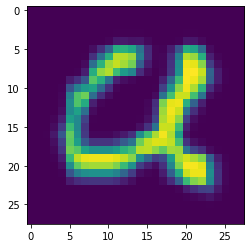

In [ ]:
plt.imshow(test_images[44].reshape(28, 28))
print(get_letter(test_labels[44]))

It probably fails because the image is so close to a u that the network can't tell the differnce

G


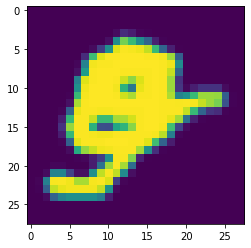

In [ ]:
plt.imshow(test_images[5102].reshape(28, 28))
print(get_letter(test_labels[5102]))

This image is just a blob so it is not suprising that the network fails to identify it

W


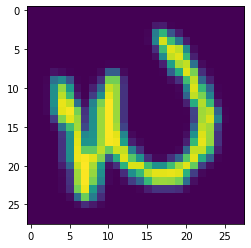

In [ ]:
plt.imshow(test_images[18315].reshape(28, 28))
print(get_letter(test_labels[18315]))

Again the image is closer to a U or V than a W which probably throws the network off